In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/open/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/open/test.csv')
sample_submission = pd.read_csv('/content/gdrive/MyDrive/open/sample_submission.csv')

In [ ]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [ ]:
test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,...,70.567966,70.528762,70.333905,70.245126,70.186665,70.010219,69.916747,69.771722,69.737748,69.601365
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,...,66.545938,66.485657,66.408375,66.255137,66.206650,66.079592,65.951010,65.884988,65.719787,65.632342
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,...,63.254101,63.134023,63.035379,62.877995,62.681351,62.499735,62.421901,62.417195,62.323963,62.307955
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,4.4,4.4,4.3,4.3,...,64.331650,64.137868,64.045153,63.944310,63.916583,63.797809,63.762720,63.681733,63.512114,63.343589


In [ ]:
X_train = train.drop(['ID','착과량(int)'], axis=1)
y_train = train['착과량(int)']

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

0. 데이터 전처리

In [ ]:
# 결측치 확인
train.isna().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

- 랜덤 포레스트 특성 중요도 (원본 데이터)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feat_labels = X_train.columns[0:]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# 중요한 특성 순으로 나열
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 20,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) 수고(m)                0.020154
 2) 수관폭평균                0.019127
 3) 수관폭2(max)            0.018988
 4) 수관폭1(min)            0.018796
 5) 2022-11-28 엽록소       0.007590
 6) 2022-09-02 엽록소       0.007514
 7) 2022-09-06 엽록소       0.007500
 8) 2022-09-01 엽록소       0.007443
 9) 2022-09-03 엽록소       0.007374
10) 2022-11-27 엽록소       0.007370
11) 2022-09-05 엽록소       0.007367
12) 2022-09-07 엽록소       0.007358
13) 2022-09-10 엽록소       0.007319
14) 2022-11-23 엽록소       0.007315
15) 2022-11-21 엽록소       0.007298
16) 2022-09-08 엽록소       0.007234
17) 2022-11-24 엽록소       0.007218
18) 2022-11-20 엽록소       0.007189
19) 2022-11-19 엽록소       0.007162
20) 2022-11-13 엽록소       0.007109
21) 2022-11-14 엽록소       0.007102
22) 2022-11-26 엽록소       0.007097
23) 2022-09-13 엽록소       0.007070
24) 2022-09-12 엽록소       0.007045
25) 2022-09-18 엽록소       0.007044
26) 2022-09-04 엽록소       0.007021
27) 2022-09-09 엽록소       0.007008
28) 2022-11-11 엽록소       0.007001
29) 2022-09-22 엽록소       0.006962
30) 2022-11-09

→ 수고(m) > 수관폭평균 > 수관폭2(max) > 수관폭1(min) 순으로 중요한 특성

→ 엽록소 데이터는 9월 초 혹은 11월 말 데이터, 새순 데이터는 9월 초가 가장 중요한 특성

0_3. 원본 데이터 + 새순과 엽록소의 통계값

In [ ]:
target_columns = train.filter(regex='새순').columns
X_train_3 = train.copy()
X_train_3['새순mean'] = X_train_3[target_columns].mean(axis=1)
X_train_3['새순std'] = X_train_3[target_columns].std(axis=1)
X_train_3['새순diff'] = X_train_3['2022-11-28 새순'] - X_train_3['2022-09-01 새순']
X_train_3['새순min'] = X_train_3[target_columns].min(axis=1)
X_train_3['새순max'] = X_train_3[target_columns].max(axis=1)

In [ ]:
target_columns = train.filter(regex='엽록소').columns
X_train_3['엽록소mean'] = X_train_3[target_columns].mean(axis=1)
X_train_3['엽록소std'] = X_train_3[target_columns].std(axis=1)
X_train_3['엽록소diff'] = X_train_3['2022-11-28 엽록소'] - X_train_3['2022-09-01 엽록소']
X_train_3['엽록소min'] = X_train_3[target_columns].min(axis=1)
X_train_3['엽록소max'] = X_train_3[target_columns].max(axis=1)

In [ ]:
target_columns = test.filter(regex='새순').columns
test_3 = test.copy()
test_3['새순mean'] = test_3[target_columns].mean(axis=1)
test_3['새순std'] = test_3[target_columns].std(axis=1)
test_3['새순diff'] = test_3['2022-11-28 새순'] - test_3['2022-09-01 새순']
test_3['새순min'] = test_3[target_columns].min(axis=1)
test_3['새순max'] = test_3[target_columns].max(axis=1)

In [ ]:
target_columns = test.filter(regex='엽록소').columns
test_3['엽록소mean'] = test_3[target_columns].mean(axis=1)
test_3['엽록소std'] = test_3[target_columns].std(axis=1)
test_3['엽록소diff'] = test_3['2022-11-28 엽록소'] - test_3['2022-09-01 엽록소']
test_3['엽록소min'] = test_3[target_columns].min(axis=1)
test_3['엽록소max'] = test_3[target_columns].max(axis=1)

In [ ]:
X_train_3 = X_train_3.drop(['ID','착과량(int)'], axis=1)

In [ ]:
test_3 = test_3.drop(['ID'], axis=1)

0_4. 원본 데이터 + 새순과 엽록소의 통계값 + 월별 통계값

In [ ]:
target_columns = train.filter(regex='새순').columns
X_train_4 = train.copy()
X_train_4['새순mean'] = X_train_4[target_columns].mean(axis=1)
X_train_4['새순std'] = X_train_4[target_columns].std(axis=1)
X_train_4['새순diff'] = X_train_4['2022-11-28 새순'] - X_train_4['2022-09-01 새순']
X_train_4['새순min'] = X_train_4[target_columns].min(axis=1)
X_train_4['새순max'] = X_train_4[target_columns].max(axis=1)

target_columns = train.filter(regex='엽록소').columns
X_train_4['엽록소mean'] = X_train_4[target_columns].mean(axis=1)
X_train_4['엽록소std'] = X_train_4[target_columns].std(axis=1)
X_train_4['엽록소diff'] = X_train_4['2022-11-28 엽록소'] - X_train_4['2022-09-01 엽록소']
X_train_4['엽록소min'] = X_train_4[target_columns].min(axis=1)
X_train_4['엽록소max'] = X_train_4[target_columns].max(axis=1)

target_columns = test.filter(regex='새순').columns
test_4 = test.copy()
test_4['새순mean'] = test_4[target_columns].mean(axis=1)
test_4['새순std'] = test_4[target_columns].std(axis=1)
test_4['새순diff'] = test_4['2022-11-28 새순'] - test_4['2022-09-01 새순']
test_4['새순min'] = test_4[target_columns].min(axis=1)
test_4['새순max'] = test_4[target_columns].max(axis=1)

target_columns = test.filter(regex='엽록소').columns
test_4['엽록소mean'] = test_4[target_columns].mean(axis=1)
test_4['엽록소std'] = test_4[target_columns].std(axis=1)
test_4['엽록소diff'] = test_4['2022-11-28 엽록소'] - test_4['2022-09-01 엽록소']
test_4['엽록소min'] = test_4[target_columns].min(axis=1)
test_4['엽록소max'] = test_4[target_columns].max(axis=1)

In [ ]:
X_train_4['9월_새순_mean'] = X_train_4.iloc[:,4:34].mean(axis = 1)
X_train_4['9월_새순_std'] = X_train_4.iloc[:,4:34].std(axis = 1)
X_train_4['9월_새순_var'] = X_train_4.iloc[:,4:34].var(axis = 1)
X_train_4['10월_새순_mean'] = X_train_4.iloc[:,34:65].mean(axis = 1)
X_train_4['10월_새순_std'] = X_train_4.iloc[:,34:65].std(axis = 1)
X_train_4['10월_새순_var'] = X_train_4.iloc[:,34:65].var(axis = 1)
X_train_4['11월_새순_mean'] = X_train_4.iloc[:,65:93].mean(axis = 1)
X_train_4['11월_새순_std'] = X_train_4.iloc[:,65:93].std(axis = 1)
X_train_4['11월_새순_var'] = X_train_4.iloc[:,65:93].var(axis = 1)
X_train_4['9월_엽록소_mean'] = X_train_4.iloc[:,93:123].mean(axis = 1)
X_train_4['9월_엽록소_std'] = X_train_4.iloc[:,93:123].std(axis = 1)
X_train_4['9월_엽록소_var'] = X_train_4.iloc[:,93:123].var(axis = 1)
X_train_4['10월_엽록소_mean'] = X_train_4.iloc[:,123:154].mean(axis = 1)
X_train_4['10월_엽록소_std'] = X_train_4.iloc[:,123:154].std(axis = 1)
X_train_4['10월_엽록소_var'] = X_train_4.iloc[:,123:154].var(axis = 1)
X_train_4['11월_엽록소_mean'] = X_train_4.iloc[:,154:182].mean(axis = 1)
X_train_4['11월_엽록소_std'] = X_train_4.iloc[:,154:182].std(axis = 1)
X_train_4['11월_엽록소_var'] = X_train_4.iloc[:,154:182].var(axis = 1)

In [ ]:
test_4['9월_새순_mean'] = test_4.iloc[:,4:34].mean(axis = 1)
test_4['9월_새순_std'] = test_4.iloc[:,4:34].std(axis = 1)
test_4['9월_새순_var'] = test_4.iloc[:,4:34].var(axis = 1)
test_4['10월_새순_mean'] = test_4.iloc[:,34:65].mean(axis = 1)
test_4['10월_새순_std'] = test_4.iloc[:,34:65].std(axis = 1)
test_4['10월_새순_var'] = test_4.iloc[:,34:65].var(axis = 1)
test_4['11월_새순_mean'] = test_4.iloc[:,65:93].mean(axis = 1)
test_4['11월_새순_std'] = test_4.iloc[:,65:93].std(axis = 1)
test_4['11월_새순_var'] = test_4.iloc[:,65:93].var(axis = 1)
test_4['9월_엽록소_mean'] = test_4.iloc[:,93:123].mean(axis = 1)
test_4['9월_엽록소_std'] = test_4.iloc[:,93:123].std(axis = 1)
test_4['9월_엽록소_var'] = test_4.iloc[:,93:123].var(axis = 1)
test_4['10월_엽록소_mean'] = test_4.iloc[:,123:154].mean(axis = 1)
test_4['10월_엽록소_std'] = test_4.iloc[:,123:154].std(axis = 1)
test_4['10월_엽록소_var'] = test_4.iloc[:,123:154].var(axis = 1)
test_4['11월_엽록소_mean'] = test_4.iloc[:,154:182].mean(axis = 1)
test_4['11월_엽록소_std'] = test_4.iloc[:,154:182].std(axis = 1)
test_4['11월_엽록소_var'] = test_4.iloc[:,154:182].var(axis = 1)

In [ ]:
X_train_4 = X_train_4.drop(['ID','착과량(int)'], axis=1)
test_4 = test_4.drop(['ID'], axis=1)

1. DecisionTree 이용 (baseline)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=123)

model.fit(X_train_4, y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
pred = model.predict(test_4)
pred

array([232., 782., 185., ..., 347., 267.,   3.])

In [ ]:
sample_submission['착과량(int)'] = pred

sample_submission.to_csv('submit_baseline.csv', index=False, encoding='utf-8')

[Text(0.5174484505351604, 0.9821428571428571, 'x[5] <= 3.75\nsquared_error = 47929.77\nsamples = 2207\nvalue = 406.222'),
 Text(0.2924014852375882, 0.9464285714285714, 'x[9] <= 2.95\nsquared_error = 12518.541\nsamples = 1112\nvalue = 592.835'),
 Text(0.15909725622842047, 0.9107142857142857, 'x[6] <= 2.65\nsquared_error = 4032.448\nsamples = 536\nvalue = 688.056'),
 Text(0.09192258759864927, 0.875, 'x[37] <= 1.95\nsquared_error = 973.728\nsamples = 195\nvalue = 752.277'),
 Text(0.08355681581044165, 0.8392857142857143, 'x[0] <= 301.5\nsquared_error = 845.431\nsamples = 190\nvalue = 753.989'),
 Text(0.0709533645090302, 0.8035714285714286, 'x[208] <= 0.928\nsquared_error = 835.105\nsamples = 182\nvalue = 755.165'),
 Text(0.05474631013810897, 0.7678571428571429, 'x[188] <= 2.875\nsquared_error = 853.422\nsamples = 149\nvalue = 752.403'),
 Text(0.03834373577174078, 0.7321428571428571, 'x[200] <= 0.029\nsquared_error = 806.076\nsamples = 143\nvalue = 754.224'),
 Text(0.012687813021702838, 0.6

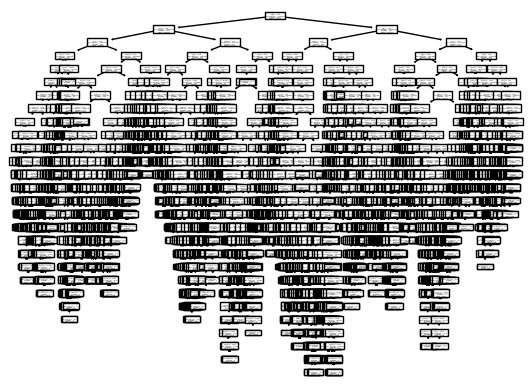

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(model)

In [ ]:
plt.show()

In [ ]:
pred = model.predict(test.drop(['ID'], axis=1))

In [ ]:
sample_submission['착과량(int)'] = pred

In [ ]:
sample_submission.to_csv('submit_tree.csv')

2. Random Forest 사용

2_0. 원본 데이터 사용

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
reg = RandomForestRegressor(random_state=123)

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

In [ ]:
gs = GridSearchCV(estimator=reg,
                  param_grid=[parameters], cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid=[{'max_depth': [None, 10, 20, 30],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10, 50, 100]}])

In [ ]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
reg_best = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10,
                                 min_samples_leaf=2, random_state=123)

In [ ]:
reg_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=123)

In [ ]:
pred = reg_best.predict(test.drop(['ID'], axis=1))

In [ ]:
pred

array([242.31358363, 751.81355181, 152.91356359, ..., 363.083686  ,
       245.77882403, 115.49714684])

In [ ]:
sample_submission['착과량(int)'] = pred

In [ ]:
sample_submission.to_csv('submit_randomforest.csv')

2_3. 원본 데이터 + 새순과 엽록소의 통계값 + 월별 통계값

In [ ]:
reg_4 = RandomForestRegressor(n_estimators=800, max_depth=10, min_samples_split=10,
                              min_samples_leaf=4, random_state=123)

In [ ]:
reg_4.fit(X_train_4, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=800, random_state=123)

In [ ]:
pred_4 = reg_4.predict(test_4)
pred_4

array([238.66944736, 752.38979328, 151.15783901, ..., 382.86830725,
       244.20437326,  80.97497254])

In [ ]:
sample_submission['착과량(int)'] = pred_4

In [ ]:
sample_submission.to_csv('submit_randomforest_6.csv', index=False, encoding='utf-8')

3. XGBoost 사용

In [ ]:
params = {
    'metric' : 'mae',
    'max_depth': 10,  # 트리의 최대 깊이
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

xgb_best_params_1 = {'lambda': 0.002645916029508221,
                     'metric' : 'mae',
                     'alpha': 0.06770804282734474,
                     'colsample_bytree': 0.42500508042724955,
                     'subsample': 0.7135736798352763,
                     'learning_rate': 0.0034491759962488127,
                     'n_estimators': 2538,
                     'max_depth': 4,
                     'min_child_weight': 2,
                     'objective': 'reg:squarederror',
                    #  'tree_method': 'gpu_hist',
                     'predictor': 'gpu_predictor'}

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=123, num_round = 10)
xgb_model.set_params(**xgb_best_params_1)

XGBRegressor(alpha=0.06770804282734474, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.42500508042724955, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=0.002645916029508221, learning_rate=0.0034491759962488127,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None, metric='mae',
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2538, ...)

In [ ]:
xgb_model.fit(X_train_3, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:38:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "metric", "num_round", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.06770804282734474, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.42500508042724955, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=0.002645916029508221, learning_rate=0.0034491759962488127,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None, metric='mae',
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2538, ...)

In [ ]:
pred_xgb = xgb_model.predict(test_3)
pred_xgb

array([243.75272, 752.7935 , 144.30922, ..., 363.68863, 235.22443,
        96.2088 ], dtype=float32)

In [ ]:
pred

array([306.41617, 622.95447, 245.32751, ..., 372.4359 , 305.6915 ,
       208.97868], dtype=float32)

In [ ]:
sample_submission['착과량(int)'] = pred

In [ ]:
sample_submission.to_csv('submit_xgb_model_2.csv', index=False, encoding='utf-8')

In [ ]:
xgb_model.fit(X_train_4, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:08:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "metric", "num_round", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.06770804282734474, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.42500508042724955, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=0.002645916029508221, learning_rate=0.0034491759962488127,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None, metric='mae',
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2538, ...)

In [ ]:
pred_xgb = xgb_model.predict(test_4)
pred_xgb

array([245.4994 , 754.4543 , 143.4652 , ..., 376.4609 , 232.85289,
        97.5542 ], dtype=float32)

4. Ensemble

In [ ]:
sample_submission['착과량(int)'] = pred_random * 0.5 + pred_xgb * 0.5

In [ ]:
sample_submission.to_csv('submit_ensemble_2.csv', index=False, encoding='utf-8')

In [ ]:
sample_submission['착과량(int)'] = pred_4 * 0.5 + pred_xgb * 0.5

In [ ]:
sample_submission.to_csv('submit_ensemble_4.csv', index=False, encoding='utf-8')